# model evaluation functions

## find best number of clusters

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs

In [2]:
def find_best_k(X, max_clusters=10):  
    # Criar lista para armazenar valores de métricas
    ch_scores = []
    db_scores = []
    sil_scores = []

    # Criar lista para armazenar o número de clusters testados
    num_clusters = list(range(2, max_clusters + 1))

    for n_clusters in num_clusters:
        # Criar objeto KMeans com o número atual de clusters
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        # Treinar o modelo com os dados
        kmeans.fit(X)
        # Calcular a métrica Kalinski-Harabasz
        ch = calinski_harabasz_score(X, kmeans.labels_)
        # Calcular a métrica Davies-Bouldin
        db = davies_bouldin_score(X, kmeans.labels_)
        # Calcular a métrica Silhouette
        sil = silhouette_score(X, kmeans.labels_)

        # Adicionar valores de métricas às listas
        ch_scores.append(ch)
        db_scores.append(db)
        sil_scores.append(sil)

    # Identificar o índice do melhor valor de cada métrica
    ch_best_idx = np.argmax(ch_scores)
    db_best_idx = np.argmin(db_scores)
    sil_best_idx = np.argmax(sil_scores)

    # Identificar o número de clusters para cada métrica
    ch_num_clusters = num_clusters[ch_best_idx]
    db_num_clusters = num_clusters[db_best_idx]
    sil_num_clusters = num_clusters[sil_best_idx]

    # Plotar gráficos para cada métrica
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].plot(num_clusters, ch_scores)
    axs[0].scatter(ch_num_clusters, ch_scores[ch_best_idx], color='red')
    axs[0].set_title('Kalinski-Harabasz')
    axs[0].set_xlabel('Número de Clusters')
    axs[0].set_ylabel('Score')

    axs[1].plot(num_clusters, db_scores)
    axs[1].scatter(db_num_clusters, db_scores[db_best_idx], color='red')
    axs[1].set_title('Davies-Bouldin')
    axs[1].set_xlabel('Número de Clusters')
    axs[1].set_ylabel('Score')

    axs[2].plot(num_clusters, sil_scores)
    axs[2].scatter(sil_num_clusters, sil_scores[sil_best_idx], color='red')
    axs[2].set_title('Silhouette')
    axs[2].set_xlabel('Número de Clusters')
    axs[2].set_ylabel('Score')

    plt.show()

    # Retornar valores de métricas e número de clusters para o melhor valor de cada métrica
    return {
        'Kalinski-Harabasz': {'score': ch_scores[ch_best_idx], 'num_clusters': ch_num_clusters},
        'Davies-Bouldin': {'score': db_scores[db_best_idx], 'num_clusters': db_num_clusters},
        'Silhouette': {'score': sil_scores[sil_best_idx], 'num_clusters': sil_num_clusters}
}

In [3]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=10, random_state=0)

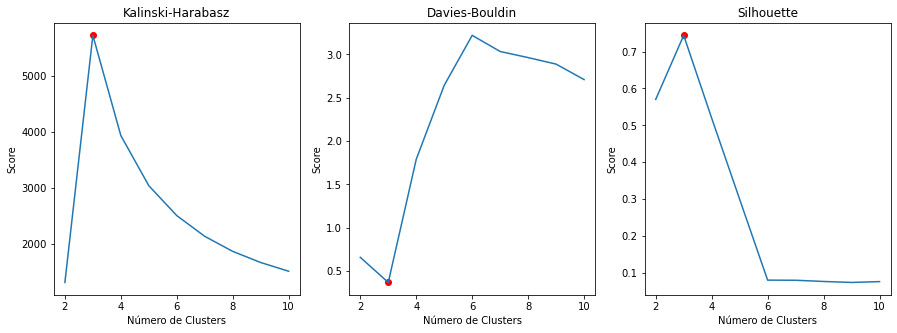

{'Kalinski-Harabasz': {'score': 5723.9356298196635, 'num_clusters': 3},
 'Davies-Bouldin': {'score': 0.36941764745003164, 'num_clusters': 3},
 'Silhouette': {'score': 0.7441518626442244, 'num_clusters': 3}}

In [4]:
find_best_k(X, 10)